In [1]:
import os

import numpy as np
from astropy.io import fits
from astropy.table import Table
import treecorr

import matplotlib.pyplot as plt

from tqdm import tqdm

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],  # You can change this font if you prefer
    "axes.labelsize": 14,  # Adjust as needed
    "axes.titlesize": 16,  # Adjust as needed
    "xtick.labelsize": 14,  # Adjust as needed
    "ytick.labelsize": 14,  # Adjust as needed
    "legend.fontsize": 12,  # Adjust as needed
    "figure.figsize": (10, 8),  # Adjust as needed
    "figure.dpi": 200  # Adjust as needed
})

from getdist import plots, MCSamples

%matplotlib inline

# Comparison with new definition of $\tau$-statistics

In [2]:
#Specify configuration for treecorr
theta_min = 0.1
theta_max = 250
nbins = 20

sep_units = 'arcmin'
coord_units = 'degrees'

treecorr_config = {
    'ra_units': coord_units,
    'dec_units': coord_units,
    'min_sep': theta_min,
    'max_sep': theta_max,
    'sep_units': sep_units,
    'nbins': nbins,
}

In [3]:
if not os.path.exists('./data/new_cov_tau.npy') or not os.path.exists('./data/new_tau_stats.fits'):
    raise ValueError('Check that the data file is complete.')
else:
    new_cov_tau = np.load('./data/new_cov_tau.npy')
    new_tau_stats = fits.getdata('./data/new_tau_stats.fits')

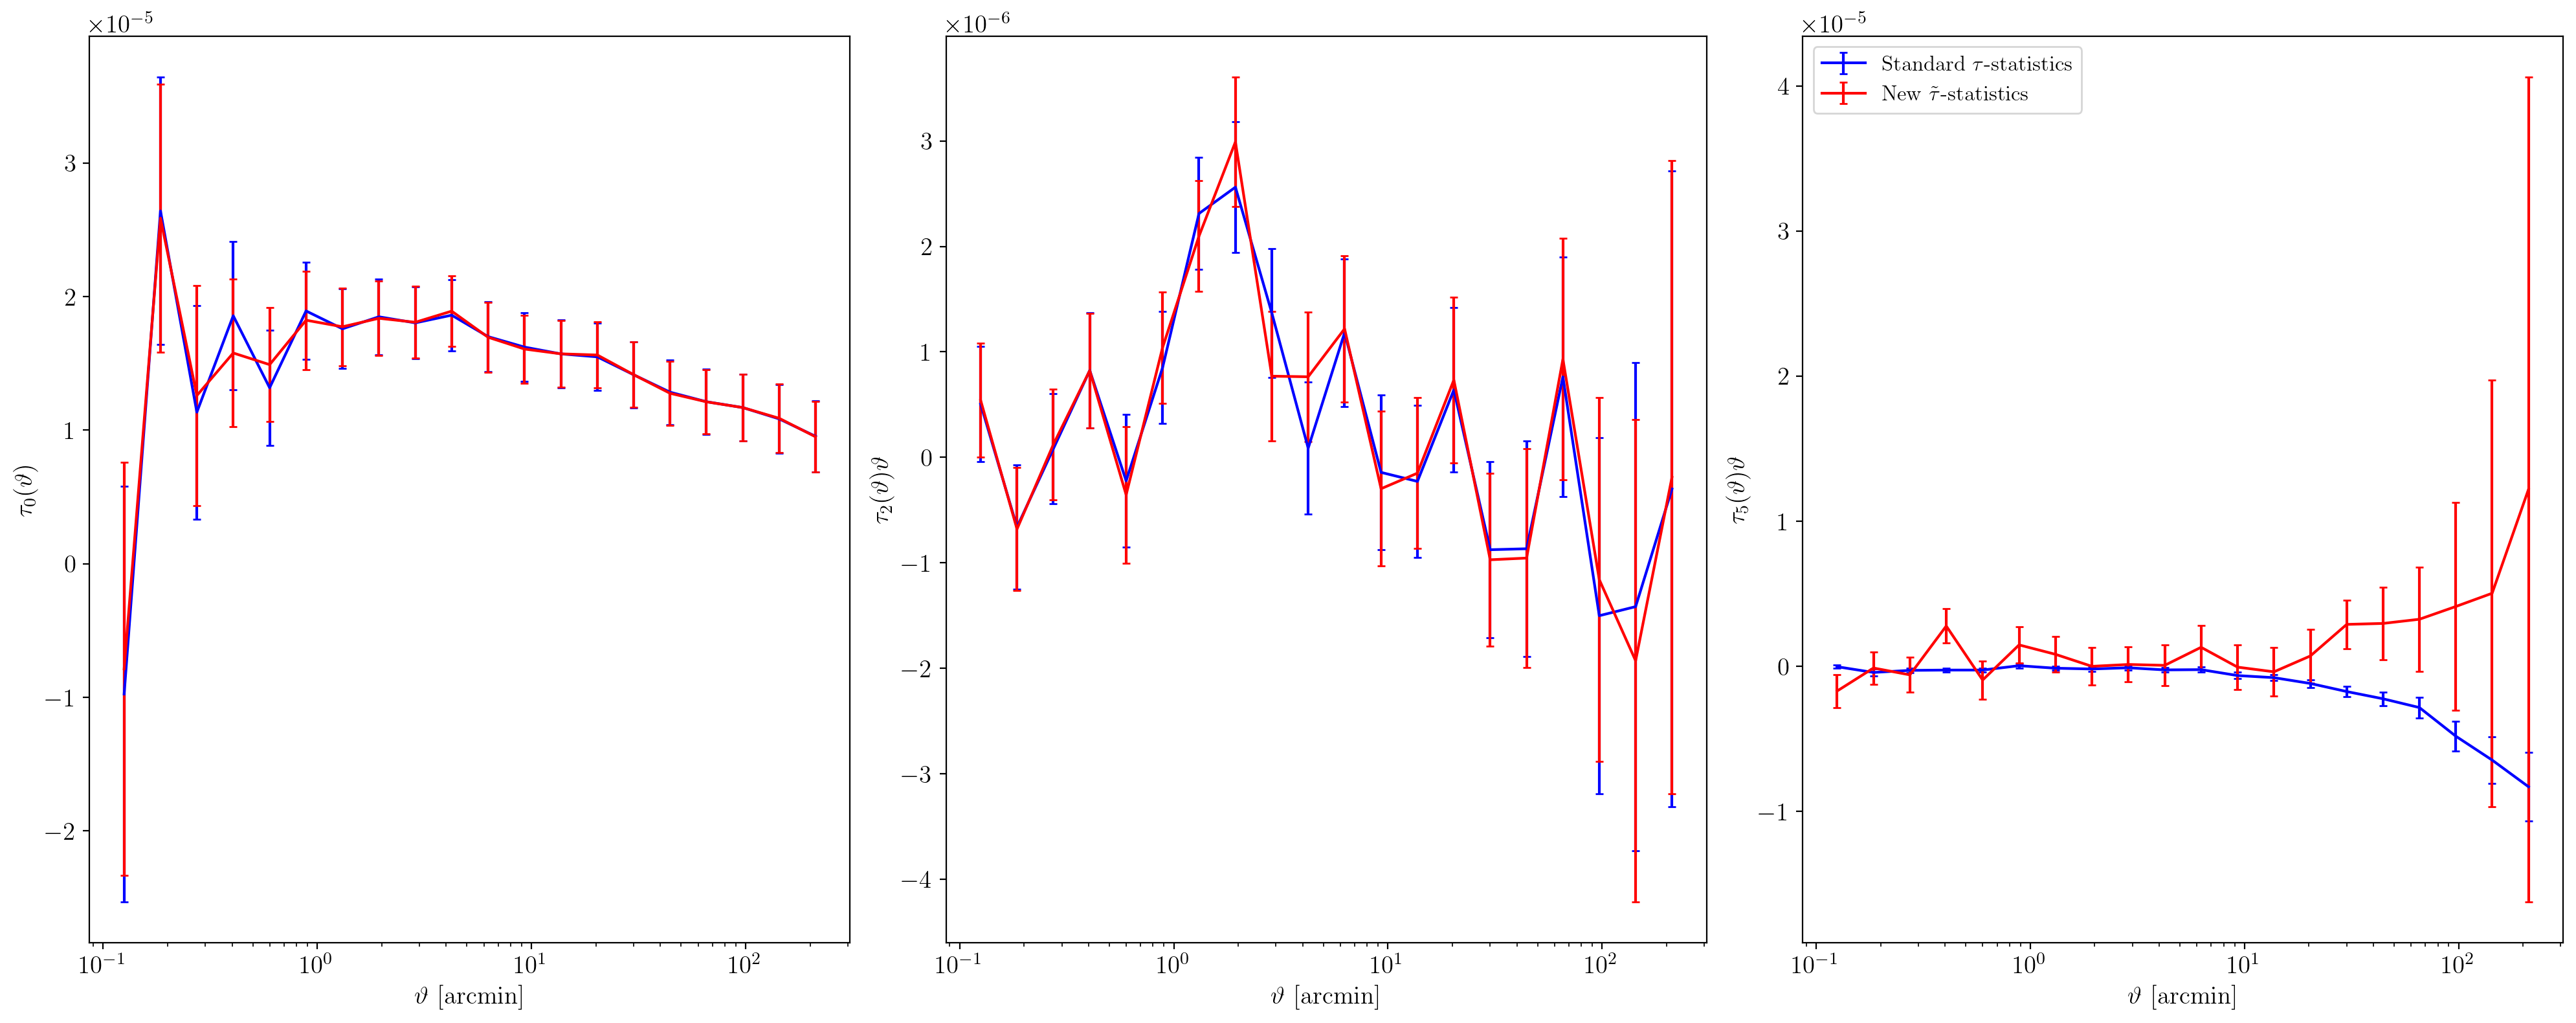

In [4]:
plt.figure(figsize=(20, 8))

tau_stats = fits.getdata('./data/tau_stats_SP_v1.3_LFmask_8k.fits')
cov_tau_jk = np.load('./data/cov_tau_SP_v1.3_LFmask_8k.npy')


plt.subplot(131)

plt.errorbar(tau_stats['theta'], tau_stats['tau_0_p'], yerr=np.sqrt(np.diag(cov_tau_jk[:20, :20])), color='blue', capsize=2)
plt.errorbar(new_tau_stats['theta'], new_tau_stats['tau_0_p'], yerr=np.sqrt(np.diag(new_cov_tau[:20, :20])), color='red', capsize=2)

plt.xscale('log')
plt.xlabel(r'$\vartheta$ [arcmin]')
plt.ylabel(r'$\tau_0(\vartheta)$')

plt.subplot(132)

plt.errorbar(tau_stats['theta'], tau_stats['tau_2_p']*tau_stats['theta'], yerr=tau_stats['theta']*np.sqrt(np.diag(cov_tau_jk[20:40, 20:40])), color='blue', capsize=2)
plt.errorbar(new_tau_stats['theta'], new_tau_stats['tau_2_p']*new_tau_stats['theta'], yerr=new_tau_stats['theta']*np.sqrt(np.diag(new_cov_tau[20:40, 20:40])), color='red', capsize=2)

plt.xscale('log')
plt.xlabel(r'$\vartheta$ [arcmin]')
plt.ylabel(r'$\tau_2(\vartheta)\vartheta$')

plt.subplot(133)

plt.errorbar(tau_stats['theta'], tau_stats['theta']*tau_stats['tau_5_p'], yerr=tau_stats['theta']*np.sqrt(np.diag(cov_tau_jk[40:, 40:])), color='blue', capsize=2, label=r'Standard $\tau$-statistics')
plt.errorbar(new_tau_stats['theta'], new_tau_stats['tau_5']*new_tau_stats['theta'], yerr=new_tau_stats['theta']*np.sqrt(np.diag(new_cov_tau[40:, 40:])), color='red', capsize=2, label=r'New $\tilde \tau$-statistics')

plt.legend()
plt.xscale('log')
plt.xlabel(r'$\vartheta$ [arcmin]')
plt.ylabel(r'$\tau_5(\vartheta)\vartheta$')

plt.tight_layout()
plt.show()

In [5]:
if not os.path.exists('./data/new_rho_stats.fits'):
    raise ValueError('Check that the data file is complete.')
else:
    new_rho_stats = fits.getdata('./data/new_rho_stats.fits')
    new_cov_rho = np.load('./data/new_cov_rho.npy')

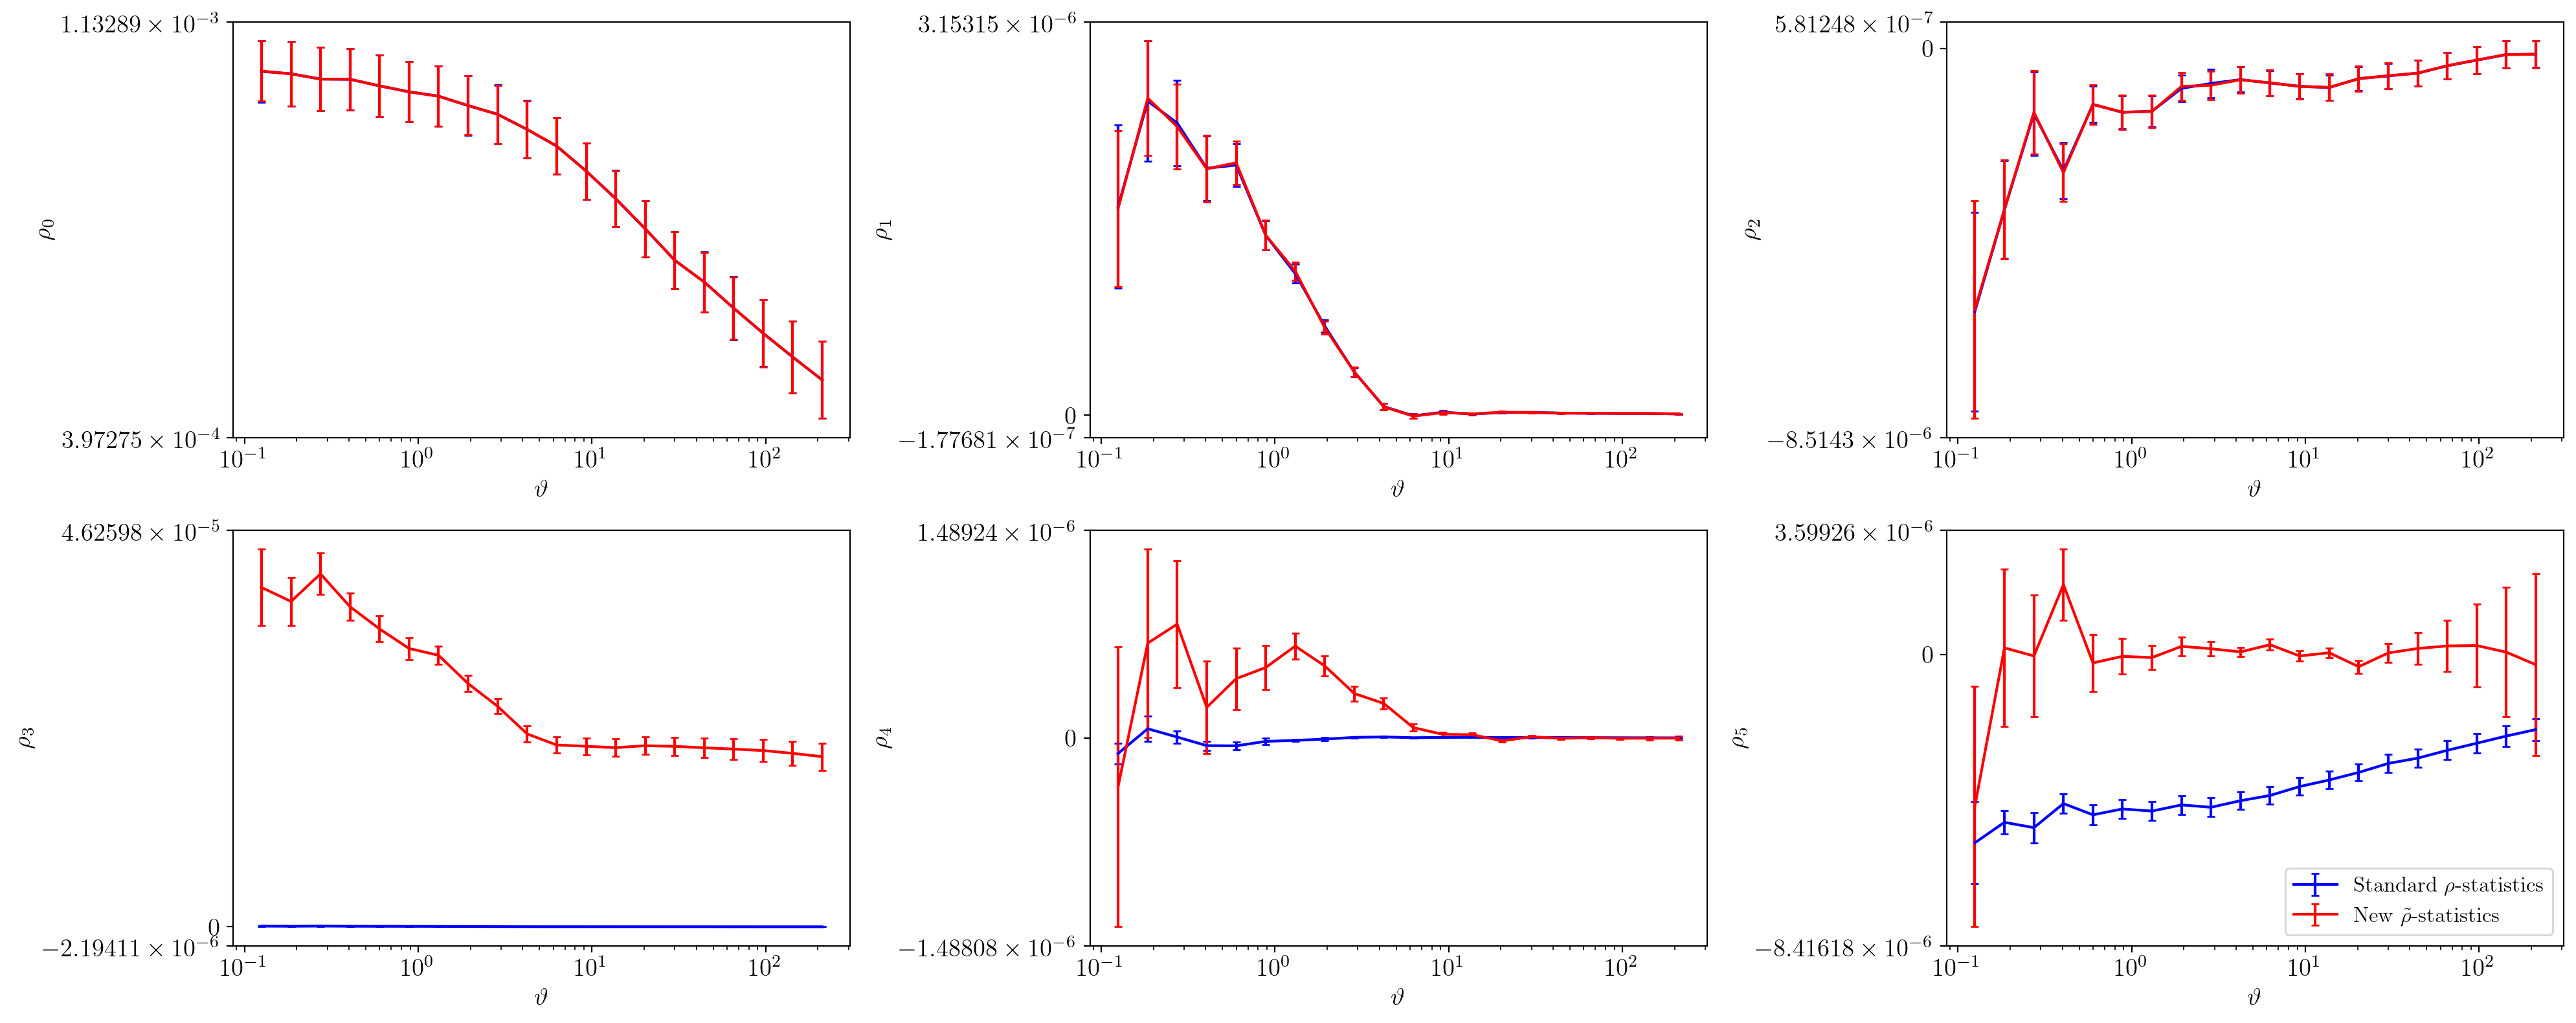

In [6]:
plt.figure(figsize=(20, 8))

rho_stats = fits.getdata('/home/guerrini/sp_validation/notebooks/cosmo_val/output/rho_tau_stats/rho_stats_SP_v1.3_LFmask_8k.fits')
cov_rho = np.load('/home/guerrini/sp_validation/notebooks/cosmo_val/output/rho_tau_stats/cov_rho_SP_v1.3_LFmask_8k.npy')

plt.subplot(231)

plt.errorbar(rho_stats['theta'], rho_stats['rho_0_p'], yerr=np.sqrt(np.diag(cov_rho[:20, :20])), c='b', capsize=2)
plt.errorbar(new_rho_stats['theta'], new_rho_stats['rho_0_p'], yerr=np.sqrt(np.diag(new_cov_rho[:20, :20])), c='r', capsize=2)

plt.xscale('log')
plt.yscale('symlog')
plt.ylabel(r'$\rho_0$')
plt.xlabel(r'$\vartheta$')

plt.subplot(232)

plt.errorbar(rho_stats['theta'], rho_stats['rho_1_p'], yerr=np.sqrt(np.diag(cov_rho[20:40, 20:40])), c='b', capsize=2)
plt.errorbar(new_rho_stats['theta'], new_rho_stats['rho_1_p'], yerr=np.sqrt(np.diag(new_cov_rho[20:40, 20:40])), c='r', capsize=2)

plt.xscale('log')
plt.yscale('symlog')
plt.ylabel(r'$\rho_1$')
plt.xlabel(r'$\vartheta$')

plt.subplot(233)

plt.errorbar(rho_stats['theta'], rho_stats['rho_2_p'], yerr=np.sqrt(np.diag(cov_rho[40:60, 40:60])), c='b', capsize=2)
plt.errorbar(new_rho_stats['theta'], new_rho_stats['rho_2_p'], yerr=np.sqrt(np.diag(new_cov_rho[40:60, 40:60])), c='r', capsize=2)

plt.xscale('log')
plt.yscale('symlog')
plt.ylabel(r'$\rho_2$')
plt.xlabel(r'$\vartheta$')

plt.subplot(234)

plt.errorbar(rho_stats['theta'], rho_stats['rho_3_p'], yerr=np.sqrt(np.diag(cov_rho[60:80, 60:80])), c='b', capsize=2)
plt.errorbar(rho_stats['theta'], new_rho_stats['rho_3'], yerr=np.sqrt(np.diag(new_cov_rho[60:80, 60:80])), c='r', capsize=2)

plt.xscale('log')
plt.yscale('symlog')
plt.ylabel(r'$\rho_3$')
plt.xlabel(r'$\vartheta$')

plt.subplot(235)

plt.errorbar(rho_stats['theta'], rho_stats['rho_4_p'], yerr=np.sqrt(np.diag(cov_rho[80:100, 80:100])), c='b', capsize=2)
plt.errorbar(new_rho_stats['theta'], new_rho_stats['rho_4'], yerr=np.sqrt(np.diag(new_cov_rho[80:100, 80:100])), c='r', capsize=2)

plt.xscale('log')
plt.yscale('symlog')
plt.ylabel(r'$\rho_4$')
plt.xlabel(r'$\vartheta$')

plt.subplot(236)

plt.errorbar(rho_stats['theta'], rho_stats['rho_5_p'], yerr=np.sqrt(np.diag(cov_rho[100:120, 100:120])), c='b', capsize=2, label=r'Standard $\rho$-statistics')
plt.errorbar(new_rho_stats['theta'], new_rho_stats['rho_5'], yerr=np.sqrt(np.diag(new_cov_rho[100:120, 100:120])), c='r', capsize=2, label=r'New $\tilde \rho$-statistics')

plt.xscale('log')
plt.yscale('symlog')
plt.ylabel(r'$\rho_5$')
plt.xlabel(r'$\vartheta$')
plt.legend()

plt.tight_layout()
plt.show()

## Systematic error analysis

We first define useful functions to perform to sample $(\alpha, \beta, \eta)$ using a Least-Square method.

In [7]:
def build_rho_matrix_all(rho_stats, fits=True):
    n_thetas = len(rho_stats['theta'])
    rho_matrix = np.zeros((3*n_thetas, 3))
    for i in range(n_thetas):
        if fits:
            rho_matrix[i] = [rho_stats['rho_0_p'][i], rho_stats['rho_2_p'][i], rho_stats['rho_5_p'][i]]
            rho_matrix[i+n_thetas] = [rho_stats['rho_2_p'][i], rho_stats['rho_1_p'][i], rho_stats['rho_4_p'][i]]
            rho_matrix[i+2*n_thetas] = [rho_stats['rho_5_p'][i], rho_stats['rho_4_p'][i], rho_stats['rho_3_p'][i]]
        else:
            rho_matrix[i] = [rho_stats[0, i], rho_stats[2, i], rho_stats[5, i]]
            rho_matrix[i+n_thetas] = [rho_stats[2, i], rho_stats[1, i], rho_stats[4, i]]
            rho_matrix[i+2*n_thetas] = [rho_stats[5, i], rho_stats[4, i], rho_stats[3, i]]
    return rho_matrix

def build_rho_matrix(rho_stats):
    n_thetas = len(rho_stats)
    rho_matrix = np.zeros((2*n_thetas, 2))
    for i in range(n_thetas):
        rho_matrix[i] = [rho_stats['rho_0_p'][i], rho_stats['rho_2_p'][i]]
        rho_matrix[i+n_thetas] = [rho_stats['rho_2_p'][i], rho_stats['rho_1_p'][i]]
    return rho_matrix

def get_least_squares_params(rho_matrix, tau_vec, cov_tau, npatch=None):
    inv_cov = np.linalg.inv(cov_tau)
    if npatch is not None:
        inv_cov = (npatch - tau_vec.shape[0]-2)/(npatch-1)*inv_cov
    optimum = np.linalg.inv(rho_matrix.T @ inv_cov @ rho_matrix) @ rho_matrix.T @ inv_cov @ tau_vec
    chi_square = (tau_vec - rho_matrix @ optimum).T @ inv_cov @ (tau_vec - rho_matrix @ optimum)
    return optimum, chi_square

def get_least_square_params_all(rho_matrix, tau_vec, cov_tau, npatch=None):
    inv_cov = np.linalg.inv(cov_tau)
    if npatch is not None:
        inv_cov = (npatch - tau_vec.shape[0]-2)/(npatch-1)*inv_cov
    optimum = np.linalg.inv(rho_matrix.T @ inv_cov @ rho_matrix) @ rho_matrix.T @ inv_cov @ tau_vec
    chi_square = (tau_vec - rho_matrix @ optimum).T @ inv_cov @ (tau_vec - rho_matrix @ optimum)
    return optimum, chi_square

def sample_least_square_params(rho_stats, cov_rho, tau_vec, cov_tau, nsamples, npatch=None):
    rho_mean = rho_stats.flatten()
    for i in tqdm(range(nsamples)):
        rho = np.random.multivariate_normal(rho_mean, cov_rho)
        rho = rho.reshape((6, -1))
        n_thetas = rho.shape[1]
        rho_matrix = np.zeros((3*n_thetas, 3))
        for j in range(n_thetas):
            rho_matrix[j] = [rho[0, j], rho[2, j], rho[5, j]]
            rho_matrix[j+n_thetas] = [rho[2, j], rho[1, j], rho[4, j]]
            rho_matrix[j+2*n_thetas] = [rho[5, j], rho[4, j], rho[3, j]]
        tau = np.random.multivariate_normal(tau_vec, cov_tau)
        inv_cov = np.linalg.inv(cov_tau)
        if npatch is not None:
            inv_cov = (npatch - tau_vec.shape[0] - 2)/(npatch-1)*inv_cov
        if i==0:
            samples = np.linalg.inv(rho_matrix.T @ inv_cov @ rho_matrix) @ rho_matrix.T @ inv_cov @ tau
        else:
            samples = np.vstack((samples, np.linalg.inv(rho_matrix.T @ inv_cov @ rho_matrix) @ rho_matrix.T @ inv_cov @ tau))
    return samples

def chi_square_all(rho_matrix, tau_vec, cov_tau, params, npatch=None):
    inv_cov = np.linalg.inv(cov_tau)
    if npatch is not None:
        inv_cov = (npatch - tau_vec.shape[0]-2)/(npatch-1)*inv_cov
    chi_square = (tau_vec - rho_matrix @ params).T @ inv_cov @ (tau_vec - rho_matrix @ params)
    return chi_square

def xi_sys_alpha_beta(rho_stats, alpha, beta, eta):
    xi_sys = alpha**2 * rho_stats['rho_0_p'] + 2*alpha*beta*rho_stats['rho_2_p'] + beta**2 * rho_stats['rho_1_p'] + eta**2 * rho_stats['rho_3_p'] + 2*alpha*eta*rho_stats['rho_5_p'] + 2*beta*eta*rho_stats['rho_4_p']
    return xi_sys

def xi_sys(rho_stats, alpha, beta, eta):
    rho_stats = rho_stats.reshape((6, -1))
    xi_sys = alpha**2 * rho_stats[0]+ beta**2 * rho_stats[1] + eta**2 * rho_stats[3] + 2*alpha*beta*rho_stats[2] + 2*alpha*eta*rho_stats[5] + 2*beta*eta*rho_stats[4]
    return xi_sys

In [8]:
cov_rho = np.load('./data/cov_rho_SP_v1.3_LFmask_8k.npy')
cov_tau = np.load('./data/cov_tau_SP_v1.3_LFmask_8k.npy')
rho_matrix = build_rho_matrix_all(rho_stats)
new_rho_matrix = np.zeros((3*len(new_rho_stats['theta']), 3))
n_thetas = len(new_rho_stats['theta'])
for i in range(n_thetas):
    new_rho_matrix[i] = [new_rho_stats['rho_0_p'][i], new_rho_stats['rho_2_p'][i], new_rho_stats['rho_5'][i]]
    new_rho_matrix[i+n_thetas] = [new_rho_stats['rho_2_p'][i], new_rho_stats['rho_1_p'][i], new_rho_stats['rho_4'][i]]
    new_rho_matrix[i+2*n_thetas] = [new_rho_stats['rho_5'][i], new_rho_stats['rho_4'][i], new_rho_stats['rho_3'][i]]
new_tau_vec = np.array([new_tau_stats['tau_0_p'], new_tau_stats['tau_2_p'], new_tau_stats['tau_5']]).flatten()
tau_vec = np.array([tau_stats['tau_0_p'], tau_stats['tau_2_p'], tau_stats['tau_5_p']]).flatten()

In [9]:
print("Least-Square optimum for version full cat")
optimum, chi_square = get_least_squares_params(rho_matrix, tau_vec, cov_tau, npatch=120)
alpha, beta, eta = optimum
print(rf"$\alpha$: {alpha:.5f}")
print(rf"$\beta$: {beta:.3f}")
print(rf"$\eta$: {eta:.3f}")
print(rf"$\chi^2$: {chi_square_all(rho_matrix, tau_vec, cov_tau, (alpha, beta, eta), npatch=120):.3f}")

Least-Square optimum for version full cat
$\alpha$: 0.01172
$\beta$: 1.058
$\eta$: -1.371
$\chi^2$: 40.487


In [10]:
print("Least-square optimum for version with new rhos and taus")
optimum, chi_square = get_least_squares_params(new_rho_matrix, new_tau_vec, new_cov_tau, npatch=150)
alpha_mag, beta_mag, eta_mag = optimum
print(rf"$\alpha$: {alpha_mag:.5f}")
print(rf"$\beta$: {beta_mag:.3f}")
print(rf"$\eta$: {eta_mag:.6f}")
print(rf"$\chi^2$: {chi_square_all(new_rho_matrix, new_tau_vec, new_cov_tau, (alpha_mag, beta_mag, eta_mag), npatch=150):.3f}")

Least-square optimum for version with new rhos and taus
$\alpha$: 0.01718
$\beta$: 0.969
$\eta$: 0.001250
$\chi^2$: 49.959


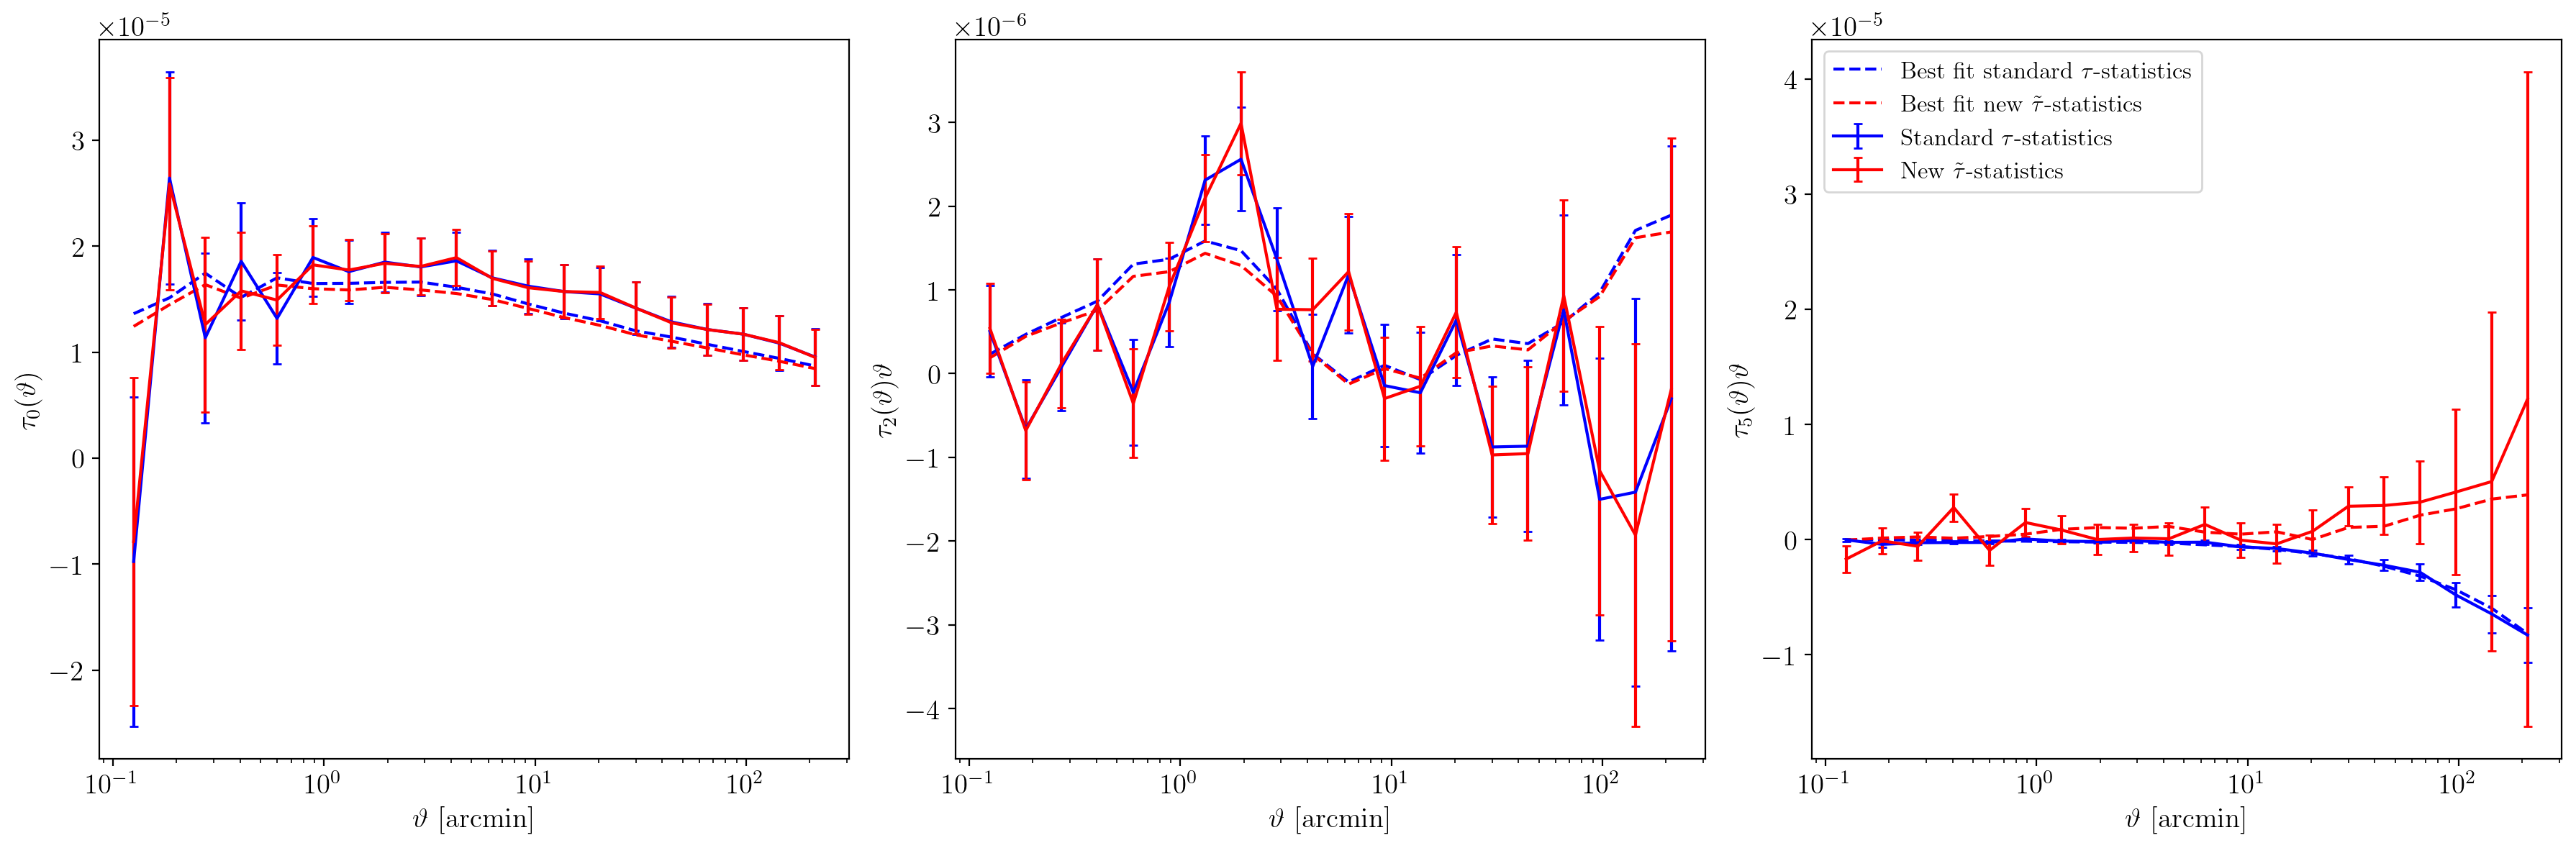

In [11]:
plt.figure(figsize=(18, 6))

best_fit = np.reshape(rho_matrix @ np.array([alpha, beta, eta]), (3, -1))
best_fit_new = np.reshape(new_rho_matrix @ np.array([alpha_mag, beta_mag, eta_mag]), (3, -1))

plt.subplot(131)

plt.errorbar(tau_stats['theta'], tau_stats['tau_0_p'], yerr=np.sqrt(np.diag(cov_tau_jk[:20, :20])), color='blue', capsize=2)
plt.plot(tau_stats['theta'], best_fit[0], color='blue', ls='--', label='best fit SP_v1.3_LFmask_8k')
plt.errorbar(new_tau_stats['theta'], new_tau_stats['tau_0_p'], yerr=np.sqrt(np.diag(new_cov_tau[:20, :20])), color='red', capsize=2)
plt.plot(new_tau_stats['theta'], best_fit_new[0], color='red', ls='--', label=r'best fit new $\tau$-statistics')

plt.xscale('log')
plt.xlabel(r'$\vartheta$ [arcmin]')
plt.ylabel(r'$\tau_0(\vartheta)$')

plt.subplot(132)

plt.errorbar(tau_stats['theta'], tau_stats['tau_2_p']*tau_stats['theta'], yerr=tau_stats['theta']*np.sqrt(np.diag(cov_tau_jk[20:40, 20:40])), color='blue', capsize=2)
plt.plot(tau_stats['theta'], best_fit[1]*tau_stats['theta'], color='blue', ls='--', label='best fit SP_v1.3_LFmask_8k')
plt.errorbar(new_tau_stats['theta'], new_tau_stats['tau_2_p']*new_tau_stats['theta'], yerr=new_tau_stats['theta']*np.sqrt(np.diag(new_cov_tau[20:40, 20:40])), color='red', capsize=2)
plt.plot(new_tau_stats['theta'], best_fit_new[1]*new_tau_stats['theta'], color='red', ls='--', label=r'best fit new $\tau$-statistics')

plt.xscale('log')
plt.xlabel(r'$\vartheta$ [arcmin]')
plt.ylabel(r'$\tau_2(\vartheta)\vartheta$')

plt.subplot(133)

plt.errorbar(tau_stats['theta'], tau_stats['theta']*tau_stats['tau_5_p'], yerr=tau_stats['theta']*np.sqrt(np.diag(cov_tau_jk[40:60, 40:60])), color='blue', capsize=2, label=r'Standard $\tau$-statistics')
plt.plot(tau_stats['theta'], tau_stats['theta']*best_fit[2], color='blue', ls='--', label=r'Best fit standard $\tau$-statistics')
plt.errorbar(new_tau_stats['theta'], new_tau_stats['tau_5']*new_tau_stats['theta'], yerr=new_tau_stats['theta']*np.sqrt(np.diag(new_cov_tau[40:60, 40:60])), color='red', capsize=2, label=r'New $\tilde \tau$-statistics')
plt.plot(new_tau_stats['theta'], new_tau_stats['theta']*best_fit_new[2], color='red', ls='--', label=r'Best fit new $\tilde \tau$-statistics')

plt.legend()
plt.xscale('log')
plt.xlabel(r'$\vartheta$ [arcmin]')
plt.ylabel(r'$\tau_5(\vartheta)\vartheta$')
plt.tight_layout()
plt.show()

In [12]:
rho_stats = np.array([rho_stats['rho_0_p'], rho_stats['rho_1_p'], rho_stats['rho_2_p'], rho_stats['rho_3_p'], rho_stats['rho_4_p'], rho_stats['rho_5_p']]).flatten()
new_rho_stats = np.array([new_rho_stats['rho_0_p'], new_rho_stats['rho_1_p'], new_rho_stats['rho_2_p'], new_rho_stats['rho_3'], new_rho_stats['rho_4'], new_rho_stats['rho_5']]).flatten()

In [13]:
#Sample parameters using Least-Squares method and plot the obtained best-fit

samples = sample_least_square_params(rho_stats, cov_rho, tau_vec, cov_tau, nsamples=10000)
samples_new = sample_least_square_params(new_rho_stats, new_cov_rho, new_tau_vec, new_cov_tau, nsamples=10000)

100%|██████████| 10000/10000 [00:31<00:00, 315.64it/s]


In [14]:
best_fit = np.reshape(rho_matrix @ samples.T, (3, -1, 10000))
best_fit_new = np.reshape(new_rho_matrix @ samples_new.T, (3, -1, 10000))

In [15]:
mean_best_fit = np.mean(best_fit, axis=2)
mean_best_fit_new = np.mean(best_fit_new, axis=2)

quantiles_best_fit = np.quantile(best_fit, [0.16, 0.84], axis=2)
quantiles_best_fit_new = np.quantile(best_fit_new, [0.16, 0.84], axis=2)

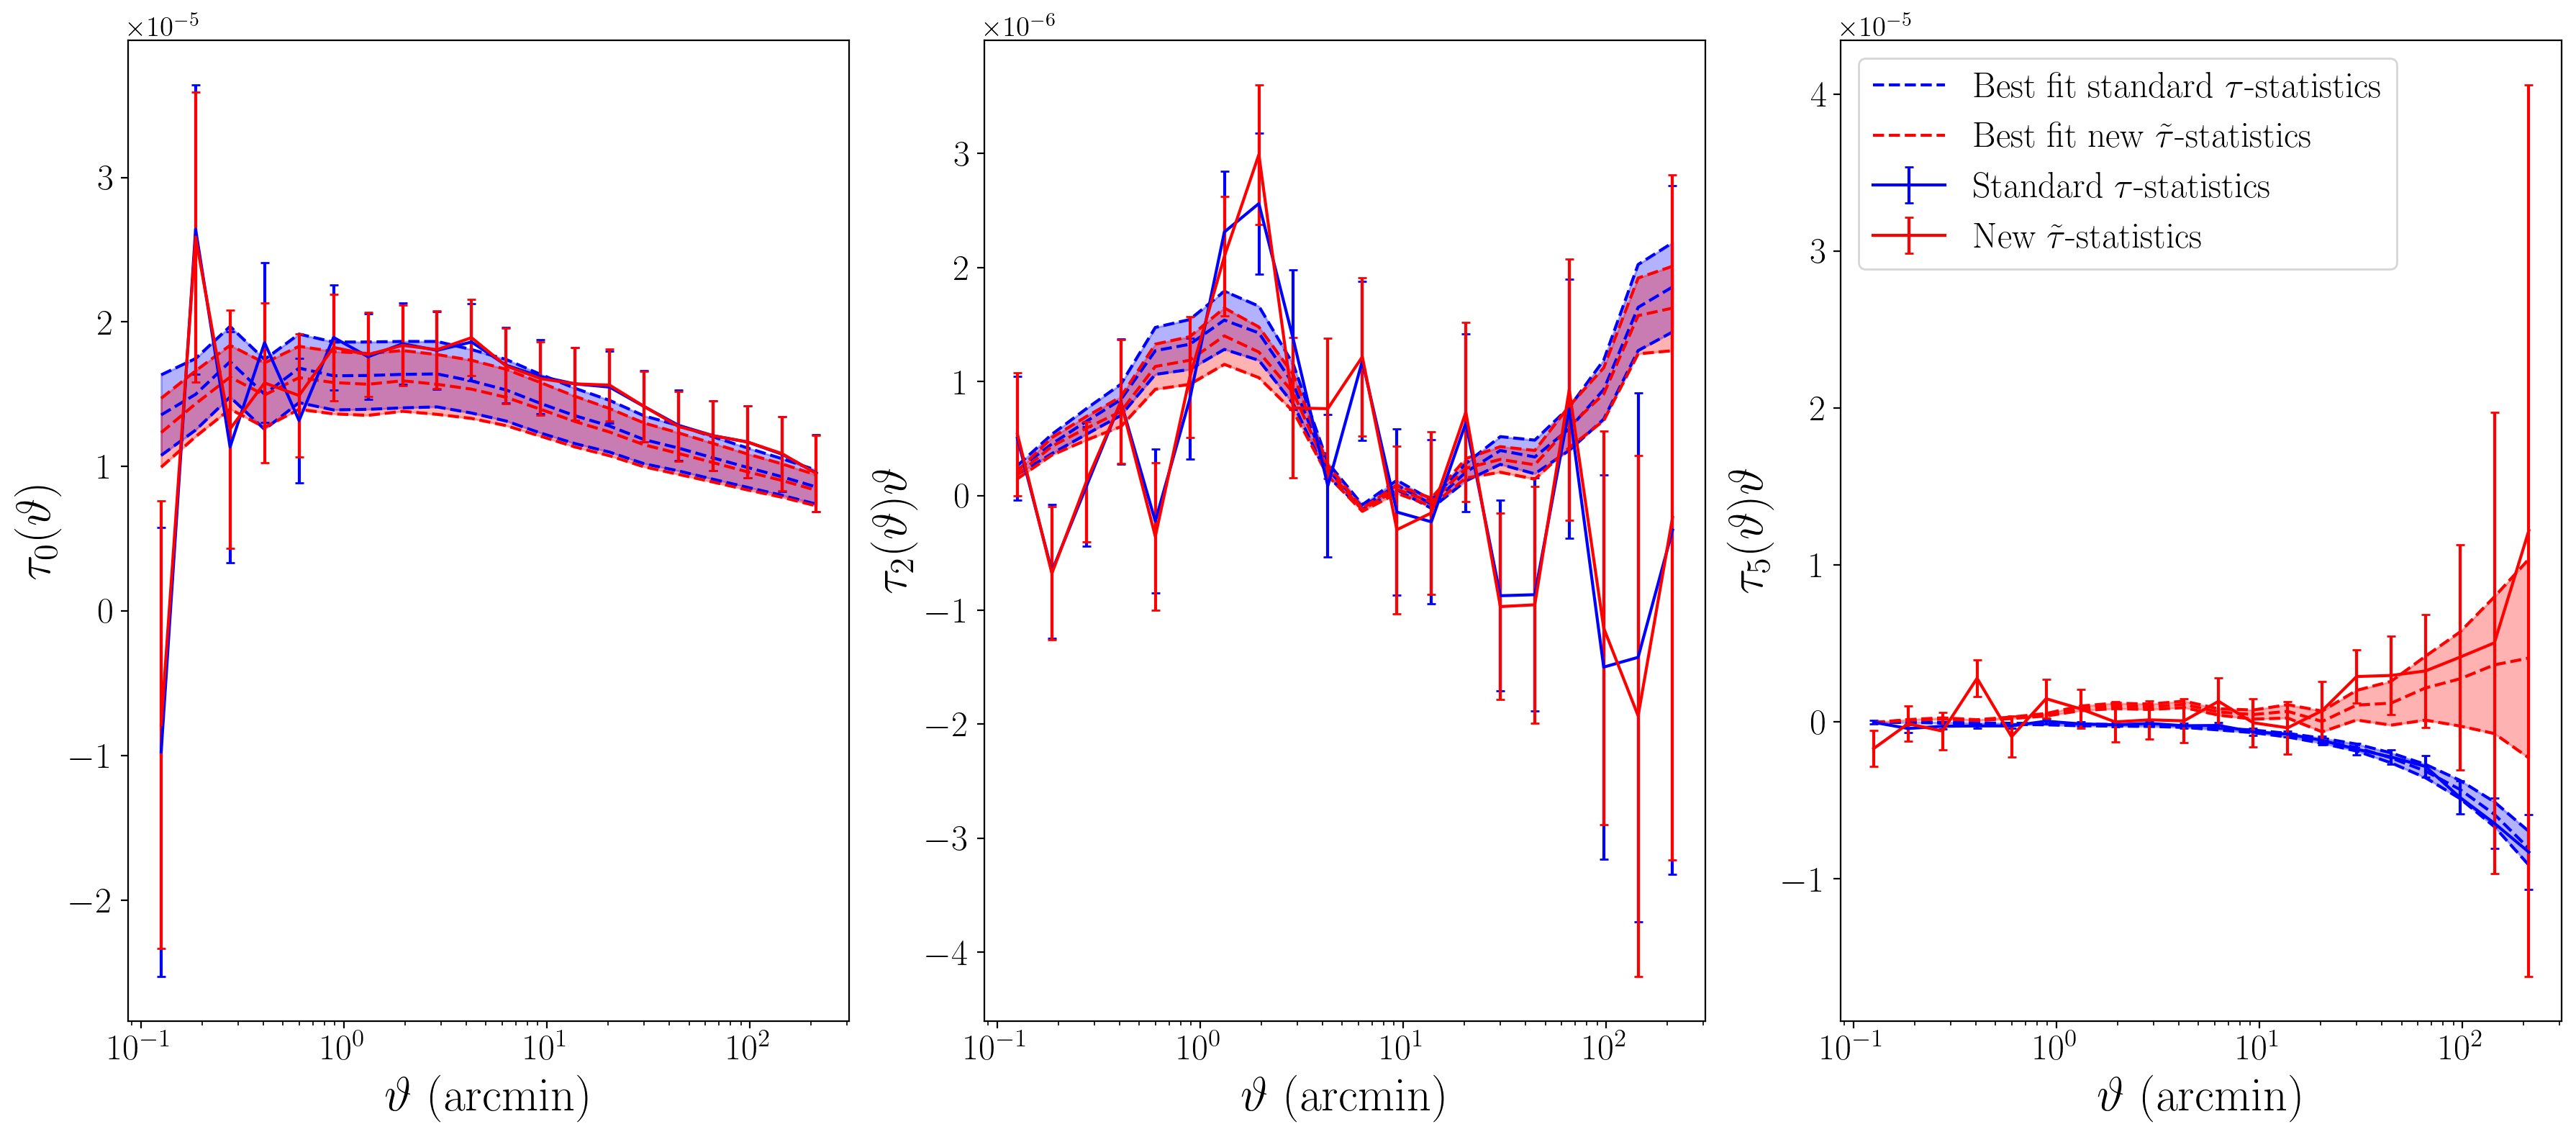

In [25]:
plt.figure(figsize=(18, 8))

plt.subplot(131)

plt.errorbar(tau_stats['theta'], tau_stats['tau_0_p'], yerr=np.sqrt(np.diag(cov_tau_jk[:20, :20])), color='blue', capsize=2)
plt.plot(tau_stats['theta'], mean_best_fit[0], color='blue', ls='--', label='best fit SP_v1.3_LFmask_8k')
plt.plot(tau_stats['theta'], quantiles_best_fit[0][0], color='blue', ls='--')
plt.plot(tau_stats['theta'], quantiles_best_fit[1][0], color='blue', ls='--')
plt.fill_between(tau_stats['theta'], quantiles_best_fit[0][0], quantiles_best_fit[1][0], color='blue', alpha=0.3)
plt.errorbar(new_tau_stats['theta'], new_tau_stats['tau_0_p'], yerr=np.sqrt(np.diag(new_cov_tau[:20, :20])), color='red', capsize=2)
plt.plot(new_tau_stats['theta'], mean_best_fit_new[0], color='red', ls='--', label='best fit tau new')
plt.plot(new_tau_stats['theta'], quantiles_best_fit_new[0][0], color='red', ls='--')
plt.plot(new_tau_stats['theta'], quantiles_best_fit_new[1][0], color='red', ls='--')
plt.fill_between(new_tau_stats['theta'], quantiles_best_fit_new[0][0], quantiles_best_fit_new[1][0], color='red', alpha=0.3)

plt.xscale('log')
plt.ylabel(r'$\tau_0(\vartheta)$', fontsize=24)
plt.xlabel(r'$\vartheta$ (arcmin)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.subplot(132)

plt.errorbar(tau_stats['theta'], tau_stats['tau_2_p']*tau_stats['theta'], yerr=tau_stats['theta']*np.sqrt(np.diag(cov_tau_jk[20:40, 20:40])), color='blue', capsize=2)
plt.plot(tau_stats['theta'], mean_best_fit[1]*tau_stats['theta'], color='blue', ls='--', label='best fit SP_v1.3_LFmask_8k')
plt.plot(tau_stats['theta'], quantiles_best_fit[0][1]*tau_stats['theta'], color='blue', ls='--')
plt.plot(tau_stats['theta'], quantiles_best_fit[1][1]*tau_stats['theta'], color='blue', ls='--')
plt.fill_between(tau_stats['theta'], quantiles_best_fit[0][1]*tau_stats['theta'], quantiles_best_fit[1][1]*tau_stats['theta'], color='blue', alpha=0.3)
plt.errorbar(new_tau_stats['theta'], new_tau_stats['tau_2_p']*new_tau_stats['theta'], yerr=new_tau_stats['theta']*np.sqrt(np.diag(new_cov_tau[20:40, 20:40])), color='red', capsize=2)
plt.plot(new_tau_stats['theta'], mean_best_fit_new[1]*new_tau_stats['theta'], color='red', ls='--', label='best fit new tau')
plt.plot(new_tau_stats['theta'], quantiles_best_fit_new[0][1]*new_tau_stats['theta'], color='red', ls='--')
plt.plot(new_tau_stats['theta'], quantiles_best_fit_new[1][1]*new_tau_stats['theta'], color='red', ls='--')
plt.fill_between(new_tau_stats['theta'], quantiles_best_fit_new[0][1]*new_tau_stats['theta'], quantiles_best_fit_new[1][1]*new_tau_stats['theta'], color='red', alpha=0.3)

plt.xscale('log')
plt.ylabel(r'$\tau_2(\vartheta) \vartheta$', fontsize=24)
plt.xlabel(r'$\vartheta$ (arcmin)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.subplot(133)

plt.errorbar(tau_stats['theta'], tau_stats['theta']*tau_stats['tau_5_p'], yerr=tau_stats['theta']*np.sqrt(np.diag(cov_tau_jk[40:60, 40:60])), color='blue', capsize=2, label=r'Standard $\tau$-statistics')
plt.plot(tau_stats['theta'], tau_stats['theta']*mean_best_fit[2], color='blue', ls='--', label=r'Best fit standard $\tau$-statistics')
plt.plot(tau_stats['theta'], tau_stats['theta']*quantiles_best_fit[0][2], color='blue', ls='--')
plt.plot(tau_stats['theta'], tau_stats['theta']*quantiles_best_fit[1][2], color='blue', ls='--')
plt.fill_between(tau_stats['theta'], tau_stats['theta']*quantiles_best_fit[0][2], tau_stats['theta']*quantiles_best_fit[1][2], color='blue', alpha=0.3)
plt.errorbar(new_tau_stats['theta'], new_tau_stats['tau_5']*new_tau_stats['theta'], yerr=new_tau_stats['theta']*np.sqrt(np.diag(new_cov_tau[40:60, 40:60])), color='red', capsize=2, label=r'New $\tilde \tau$-statistics')
plt.plot(new_tau_stats['theta'], new_tau_stats['theta']*mean_best_fit_new[2], color='red', ls='--', label=r'Best fit new $\tilde \tau$-statistics')
plt.plot(new_tau_stats['theta'], new_tau_stats['theta']*quantiles_best_fit_new[0][2], color='red', ls='--')
plt.plot(new_tau_stats['theta'], new_tau_stats['theta']*quantiles_best_fit_new[1][2], color='red', ls='--')
plt.fill_between(new_tau_stats['theta'], new_tau_stats['theta']*quantiles_best_fit_new[0][2], new_tau_stats['theta']*quantiles_best_fit_new[1][2], color='red', alpha=0.3)

plt.legend(fontsize=18)
plt.xscale('log')
plt.ylabel(r'$\tau_5(\vartheta) \vartheta$', fontsize=24)
plt.xlabel(r'$\vartheta$ (arcmin)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.savefig("Plots/sample_new_tau.png", dpi=600, bbox_inches='tight')
plt.show()

In [20]:
#Confidence interval at the 68% confidence level
np.percentile(samples, [16, 50, 84], axis=0)

array([[ 0.00511075,  0.85059013, -2.70325998],
       [ 0.01134984,  1.0278672 , -1.38695189],
       [ 0.01773739,  1.2004939 , -0.07539834]])

In [21]:
#Confidence interval at the 68% confidence level with the redefinition of rho and tau-statistics
np.percentile(samples_new, [16, 50, 84], axis=0)

array([[ 1.48153483e-02,  7.80049174e-01, -2.17822849e-04],
       [ 1.69540967e-02,  9.44009695e-01,  1.29237264e-03],
       [ 1.91105464e-02,  1.10609845e+00,  2.78409104e-03]])

## Check the degeneracy in the $(\alpha, \eta)$-plane

Removed no burn in
Removed no burn in


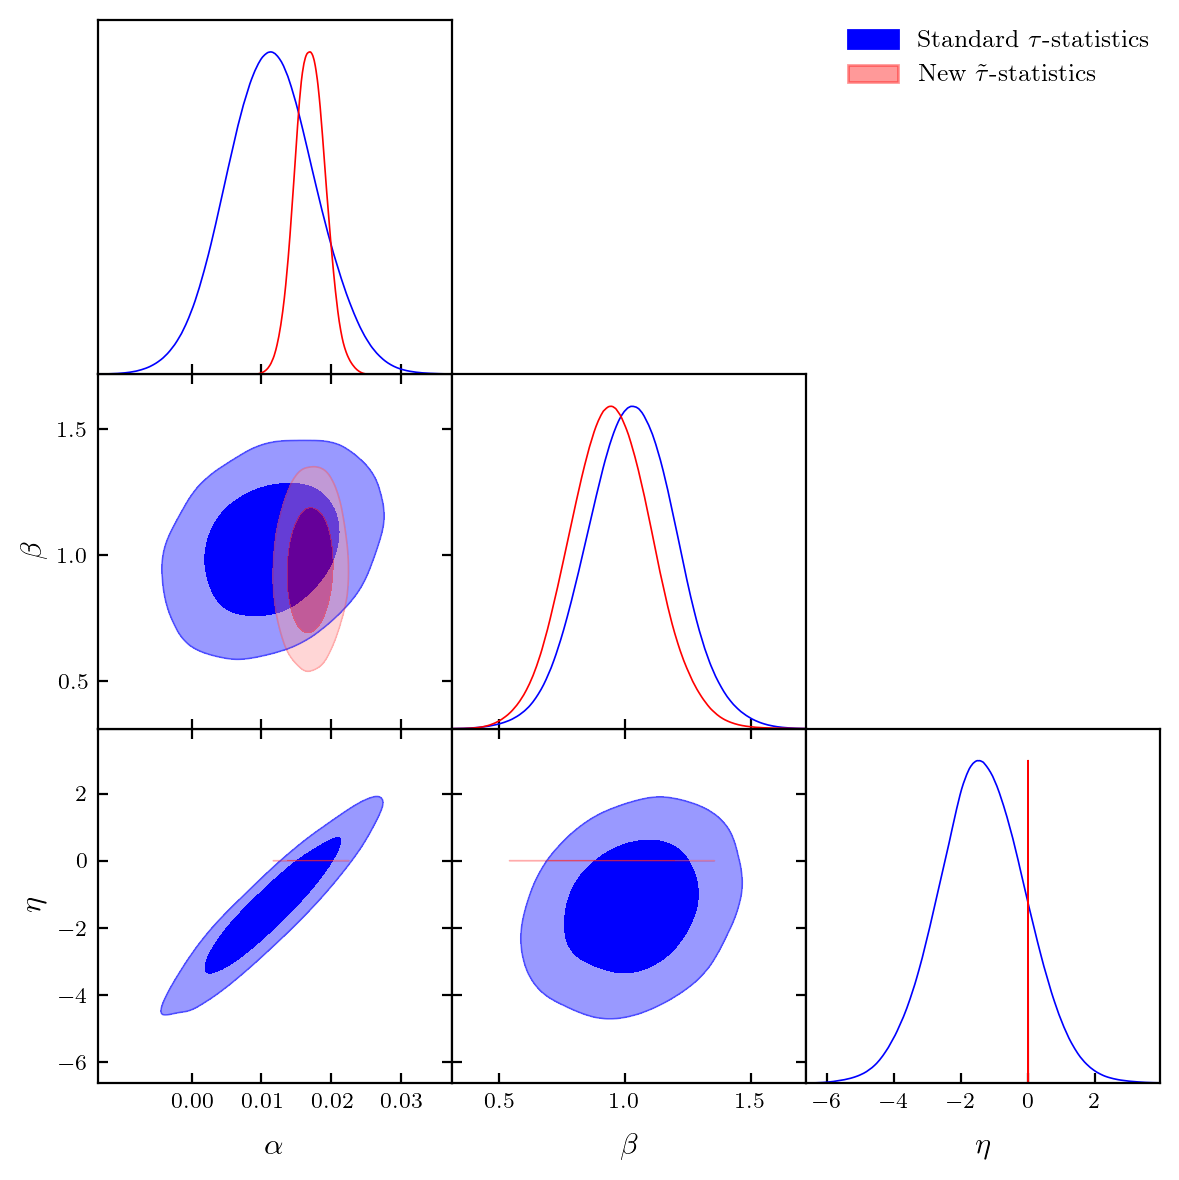

In [22]:
g = plots.get_subplot_plotter()

g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.4

samples_gd = MCSamples(samples=samples, names=[r"\alpha", r"\beta", r"\eta"], labels=[r"\alpha", r"\beta", r"\eta"])
samples_new_gd = MCSamples(samples=samples_new, names=[r"\alpha", r"\beta", r"\eta"], labels=[r"\alpha", r"\beta", r"\eta"])


g.triangle_plot([samples_gd, samples_new_gd],
                filled=True,
                legend_labels=[r'Standard $\tau$-statistics', r'New $\tilde \tau$-statistics'],
                legend_loc='upper right',
                line_args=[
                    {'color': 'blue'},
                    {'color': 'red'},
                ],
                contour_colors=['blue', 'red'])

plt.show()

Removed no burn in
Removed no burn in


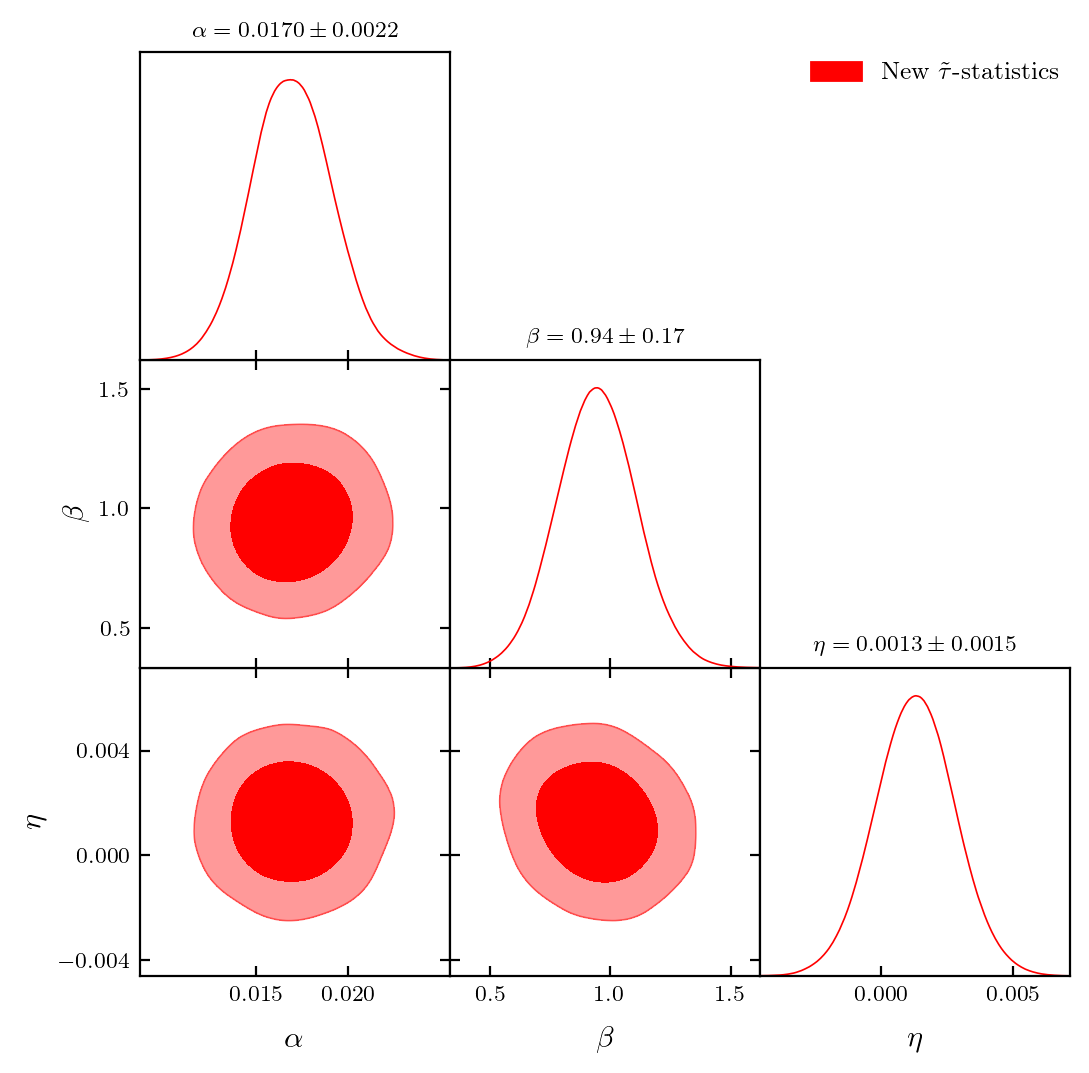

In [23]:
g = plots.get_subplot_plotter()

g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.4

samples_gd = MCSamples(samples=samples, names=[r"\alpha", r"\beta", r"\eta"], labels=[r"\alpha", r"\beta", r"\eta"])
samples_new_gd = MCSamples(samples=samples_new, names=[r"\alpha", r"\beta", r"\eta"], labels=[r"\alpha", r"\beta", r"\eta"])


g.triangle_plot([samples_new_gd],
                filled=True,
                legend_labels=[r'New $\tilde \tau$-statistics'],
                legend_loc='upper right',
                line_args=[
                    {'color': 'red'},
                ],
                contour_colors=['red'],
                title_limit=1)

plt.show()

In [24]:
xi_sys_old = np.empty(shape=(0,20))
for sample in samples:
    xi_sys_old = np.vstack((xi_sys_old, xi_sys(rho_stats, *sample)))

xi_sys_new = np.empty(shape=(0, 20))

for sample in samples_new:
    xi_sys_new = np.vstack((xi_sys_new, xi_sys(new_rho_stats, *sample)))

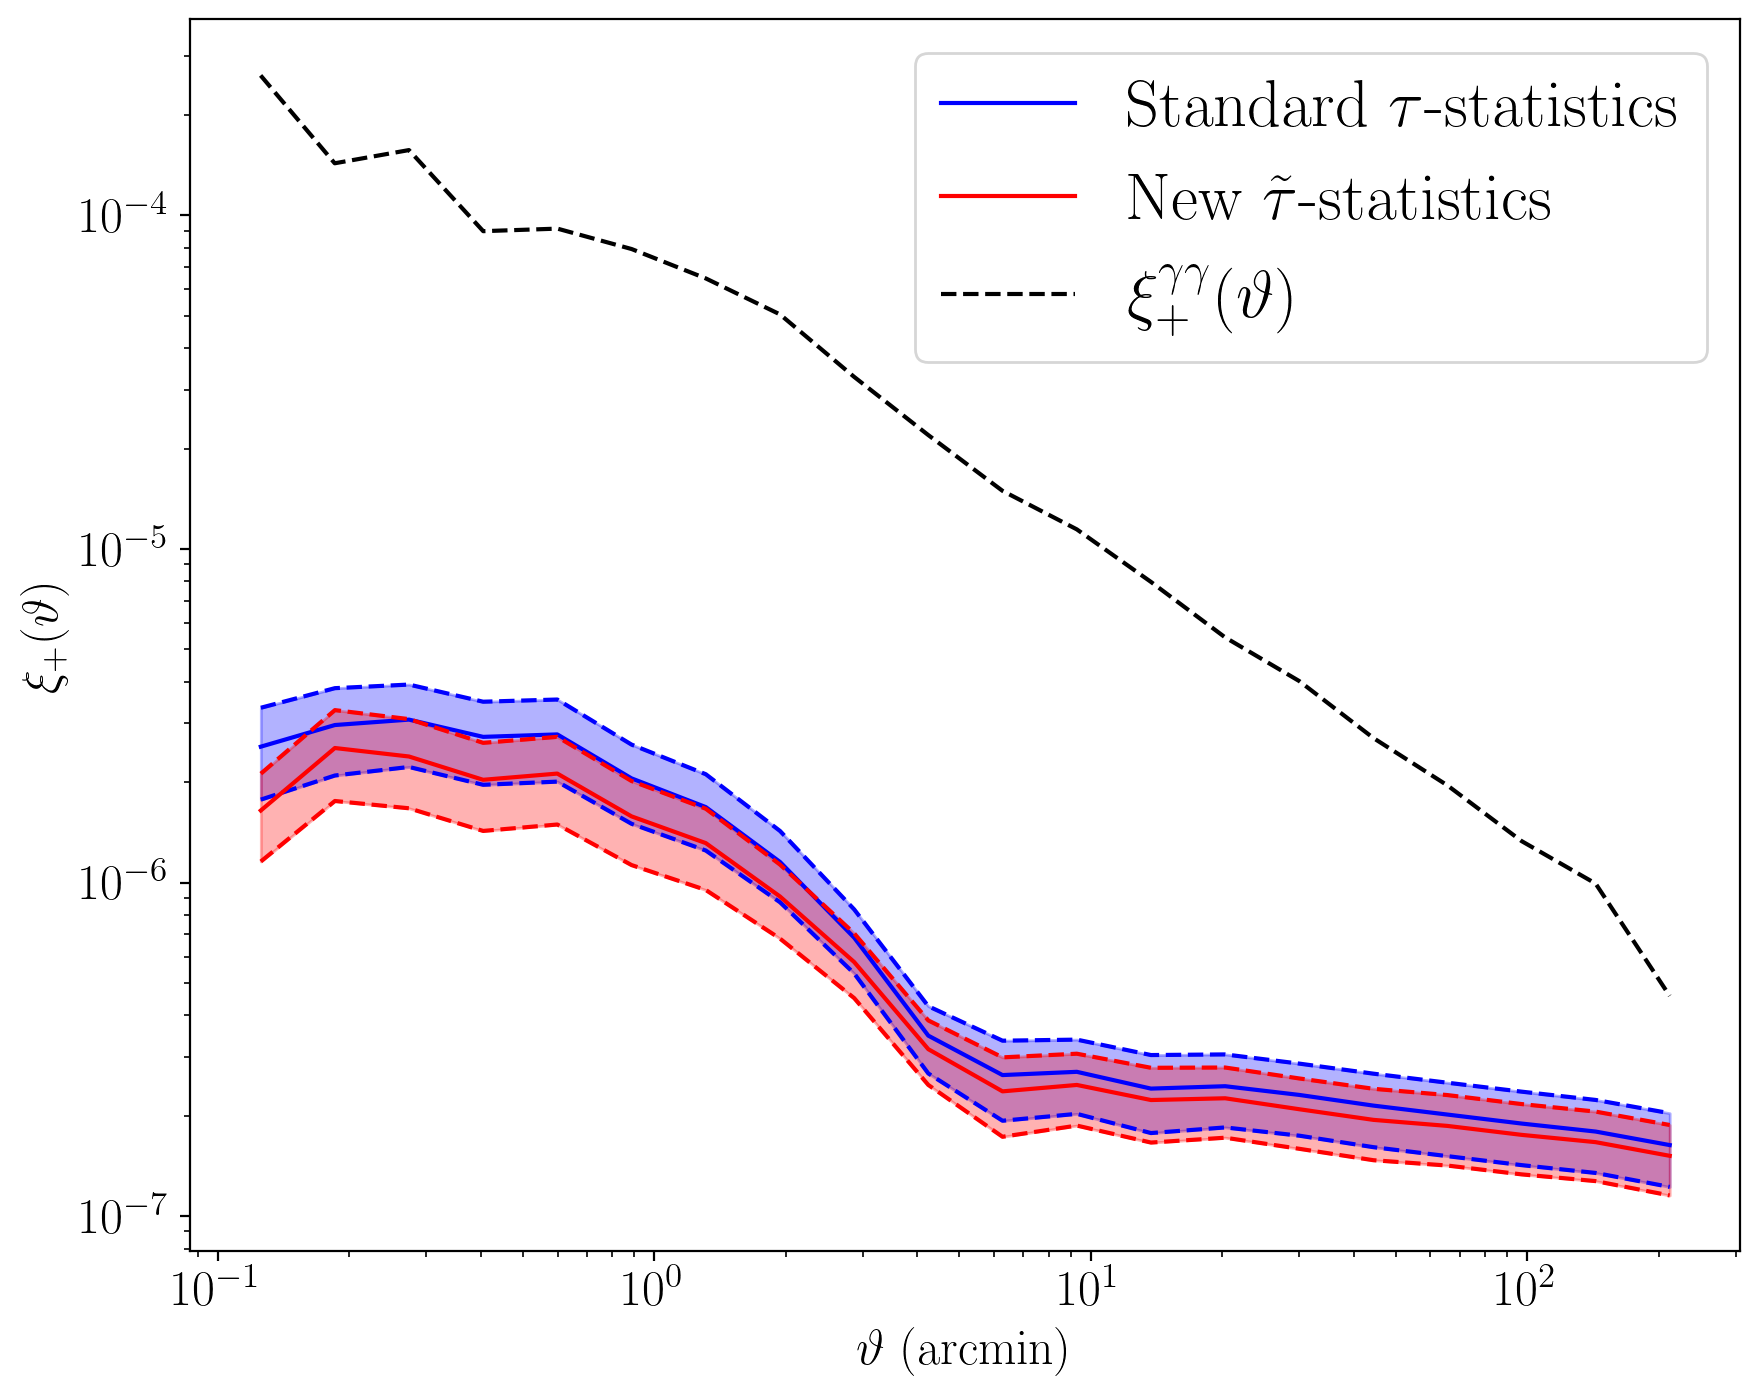

In [28]:
plt.figure()

mean_xi_sys_old = np.mean(xi_sys_old, axis=0)
mean_xi_sys_new = np.mean(xi_sys_new, axis=0)

percentiles_xi_sys_old = np.percentile(xi_sys_old, [16, 84], axis=0)
percentiles_xi_sys_new = np.percentile(xi_sys_new, [16, 84], axis=0)

plt.plot(tau_stats['theta'], mean_xi_sys_old, color='blue', label=r'Standard $\tau$-statistics')
plt.plot(tau_stats['theta'], percentiles_xi_sys_old[0], c='b', ls='--')
plt.plot(tau_stats['theta'], percentiles_xi_sys_old[1], c='b', ls='--')
plt.fill_between(tau_stats['theta'], percentiles_xi_sys_old[0], percentiles_xi_sys_old[1], color='blue', alpha=0.3)
plt.plot(tau_stats['theta'], mean_xi_sys_new, color='red', label=r'New $\tilde \tau$-statistics')
plt.plot(tau_stats['theta'], percentiles_xi_sys_new[0], c='r', ls='--')
plt.plot(tau_stats['theta'], percentiles_xi_sys_new[1], c='r', ls='--')
plt.fill_between(tau_stats['theta'], percentiles_xi_sys_new[0], percentiles_xi_sys_new[1], color='red', alpha=0.3)

xi_p_old = fits.getdata('/home/guerrini/sp_validation/notebooks/cosmo_val/output/xi_plus_SP_v1.3_LFmask_8k.fits')

plt.plot(xi_p_old['ANG'], xi_p_old['VALUE'], color='black', ls='--', label=r'$\xi^{\gamma \gamma}_+(\vartheta)$')


plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\vartheta$ (arcmin)', fontsize=18)
plt.ylabel(r'$\xi_+(\vartheta)$', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=24)
plt.savefig("Plots/xi_sys_new_tau.png", dpi=600, bbox_inches='tight')
plt.show()